<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/DSML-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Códigos del texto DSML SVM

Support Vector Machines (SVM) son un conjunto de métodos supervisados utilizados tanto para clasificación como para regresión. SVM tiene varias ventajas, entre ellas su efectividad en espacios de alta dimensionalidad y su uso eficiente de la memoria. Primero, cargaremos algunos datos artificiales para clasificación.

### Clasificación con SVM (Kernel Lineal)

Primero, probaremos el kernel lineal.


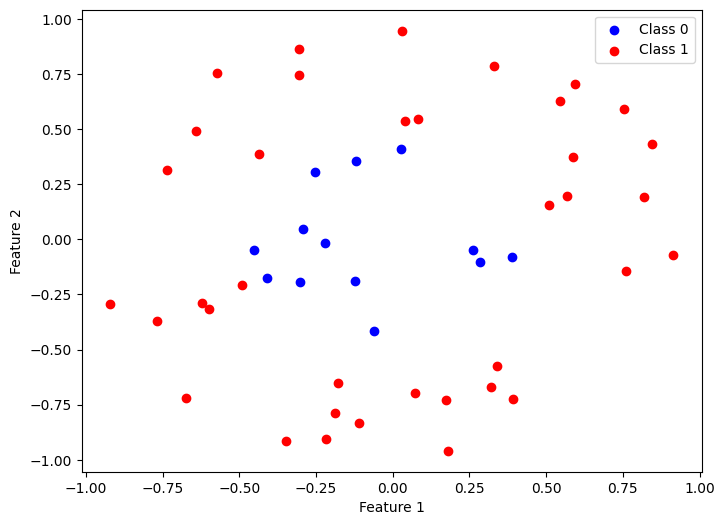

In [13]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.svm import SVC
url_data = 'https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/svmcirc.csv'
data = genfromtxt(url_data, delimiter=',')
x = data[:,[0,1]] #vectors are rows
y = data[:,[2]].reshape(len(x),) #labels

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[y==1,0], data[y==1,1], c='blue', label='Class 0')
plt.scatter(data[y==-1,0], data[y==-1,1], c='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [14]:
tmp = np.sum(np.power(x,2),axis=1).reshape((len(x),1))
z = np.hstack((x,tmp))

clf = SVC(C = np.inf, kernel='linear')
clf.fit(z,y)

print("Support Vectors \n", clf.support_vectors_)
print("Support Vector Labels ",y[clf.support_])
print("Alpha ",clf.dual_coef_)
print("Bias ",clf.intercept_)

Support Vectors 
 [[ 0.038758    0.53796     0.29090314]
 [-0.49116    -0.20563     0.28352184]
 [-0.45068    -0.04797     0.20541358]
 [-0.061107   -0.41651     0.17721465]]
Support Vector Labels  [-1. -1.  1.  1.]
Alpha  [[ -46.49249413 -249.01807328  265.31805855   30.19250886]]
Bias  [5.617891]


In [4]:
import numpy as np
import plotly.graph_objects as go

# Create grid
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2

# Create Plotly 3D surface plot
fig = go.Figure(data=[
    go.Surface(z=Z, x=X1, y=X2, colorscale='Viridis', opacity=0.7),
    go.Scatter3d(x=x[y==1,0], y=x[y==1,1],
                 z=x[y==1,0]**2 + x[y==1,1]**2,
                 mode='markers', marker=dict(color='blue', size=5)),
    go.Scatter3d(x=x[y==-1,0], y=x[y==-1,1],
                 z=x[y==-1,0]**2 + x[y==-1,1]**2,
                 mode='markers', marker=dict(color='red', size=5))
])

fig.show()  # Fully interactive, rotatable plot

In [6]:
import matplotlib.pyplot as plt

def mykernel(U,V):
    tmpU = np.sum(np.power(U,2),axis=1).reshape((len(U),1))
    U = np.hstack((U,tmpU))
    tmpV = np.sum(np.power(V,2),axis=1).reshape((len(V),1))
    V = np.hstack((V,tmpV))
    K = U @ V.T
    print(K.shape)
    return K

# read in the data
inp = genfromtxt(url_data, delimiter=',')
data = inp[:,[0,1]] #vectors are rows
y = inp[:,[2]].reshape(len(data),) #labels

clf = SVC(C = np.inf, kernel=mykernel, gamma='auto')
#clf = SVC(C = np.inf, kernel="rbf", gamma='scale')

clf.fit(data,y)


(50, 50)


SVC(C=inf, gamma='auto', kernel=<function mykernel at 0x7c7ed0286b90>)

### Clasificación con SVM (Kernel rbf)

Ahora, probaremos el kernel rbf.

Support Vectors 
 []
Support Vector Labels  [-1. -1.  1.  1.]
Nu [[ -46.49249413 -249.01807328  265.31805855   30.19250886]]
Bias  [5.617891]
(4000000, 50)


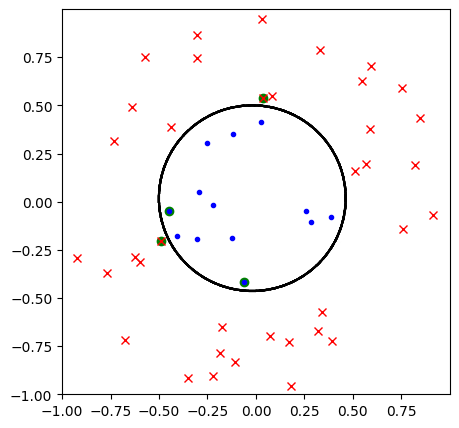

In [7]:
print("Support Vectors \n", clf.support_vectors_)
print("Support Vector Labels ",y[clf.support_])
print("Nu",clf.dual_coef_)
print("Bias ",clf.intercept_)

# plot
d = 0.001

fig = plt.figure(figsize=(5,5))

x_min, x_max = -1,1
y_min, y_max = -1,1
xx, yy = np.meshgrid(np.arange(x_min, x_max, d), np.arange(y_min, y_max, d))

plt.plot(data[clf.support_,0],data[clf.support_,1],'go')
plt.plot(data[y==1,0],data[y==1,1],'b.')
plt.plot(data[y==-1,0],data[y==-1,1],'rx')
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z,colors ="k")
plt.show()

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig.savefig("mykernel.pdf", bbox_inches='tight')
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


### Clasificación con SVM (Breast Cancer dataset)

Ahora probaremos con un dataset real y comparamos con los modelos de Regresión Logística y KNN.

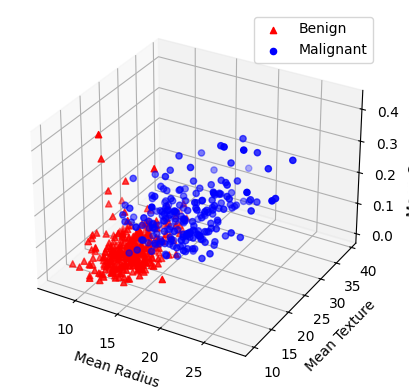

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/"
name = "wdbc.data"

data = genfromtxt(url + name,delimiter=',', dtype=str)
y = data[:,1] #responses
X = data[:,2:].astype('float')#features as an ndarray matrix

X_train , X_test , y_train , y_test = train_test_split(
        X, y, test_size = 0.4, random_state = 1234)


Bidx = np.where(y == 'B')
Midx= np.where(y == 'M')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot features Radius (column 0), Texture (1), Concavity (6)
ax.scatter(X[Bidx, 0], X[Bidx, 1], X[Bidx, 6],
           c='r', marker='^', label='Benign')
ax.scatter(X[Midx, 0], X[Midx, 1], X[Midx, 6],
           c='b', marker='o', label='Malignant')

# Add legend and labels
ax.legend()
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')
ax.set_zlabel('Mean Concavity')

# Save the plot
plt.savefig('scatter_bcancer.pdf', format='pdf')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#import numpy as np
#from sklearn.preprocessing import MinMaxScaler

names = ["Logit", "KNN", "SVM"]
#%%
classifiers = [LogisticRegression(C=1e5,max_iter=1000),
               KNeighborsClassifier(n_neighbors=5),
               SVC(kernel='rbf', gamma = 1e-4)]

print('Name  Accuracy\n'+14*'-')
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:6}  {:3.3f}'.format(name, accuracy_score(y_test,y_pred)))

Name  Accuracy
--------------
Logit   0.943
KNN     0.925
SVM     0.939


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

